In [1]:
pip install pandas

     |████████████████████████████████| 9.5 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 41.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 65.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 283 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 9.4 MB/s eta 0:00:01    |██████▊                         | 2.4 MB 9.4 MB/s eta 0:00:01 |██████████████████████████████▋ | 11.1 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 2.9 kB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 43.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 28.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('bigmart/Train.csv') 

In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
df.isna().sum() #bisa dr item type (mean bs)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Dari data diatas bisa dilihat kita mempunyai 2 data yg mempunyai null value, maka bisa kita lihat apakah data angka ada outliers atau tidak. jika ada maka kita bisa menggunakan median untuk fill na, jika tidak kita bs menggunakan mean.
untuk categorikal kita bisa menggunakan modus

In [8]:
df['Item_Weight'].isna().value_counts() 

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [9]:
df['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

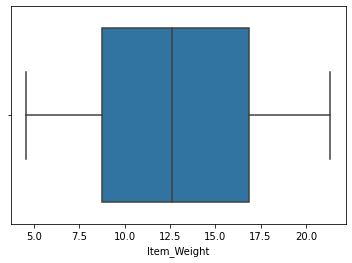

In [10]:
sns.boxplot(df['Item_Weight'])
plt.show()

Dikarenakan data nya itu merupakan berat suatu barang dan tidak ada outliers, maka kita bisa menggunakan rata2 untuk menentukan berat suatu barang yg tidak memiliki value sebelumnya.

In [11]:
df['Item_Weight'][(df['Item_Type']=='Dairy')& (df['Item_Weight'].isna())]= df['Item_Weight'][df['Item_Type']=='Dairy'].mean()
df['Item_Weight'][(df['Item_Type']=='Seafood')& (df['Item_Weight'].isna())]= df['Item_Weight'][df['Item_Type']=='Seafood'].mean()
df['Item_Weight'][(df['Item_Type']=='Meat')& (df['Item_Weight'].isna())]=df['Item_Weight'][df['Item_Type']=='Meat'].mean()
df['Item_Weight'][(df['Item_Type']=='Soft Drinks')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Soft Drinks'].mean()
df['Item_Weight'][(df['Item_Type']=='Fruits and Vegetables')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Fruits and Vegetables'].mean()
df['Item_Weight'][(df['Item_Type']=='Household')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Household'].mean()
df['Item_Weight'][(df['Item_Type']=='Baking Goods')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Baking Goods'].mean()
df['Item_Weight'][(df['Item_Type']=='Snack Foods')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Snack Foods'].mean()
df['Item_Weight'][(df['Item_Type']=='Frozen Foods')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Frozen Foods'].mean()
df['Item_Weight'][(df['Item_Type']=='Breakfast')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Breakfast'].mean()
df['Item_Weight'][(df['Item_Type']=='Health and Hygiene')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Health and Hygiene'].mean()
df['Item_Weight'][(df['Item_Type']=='Hard Drinks')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Hard Drinks'].mean()
df['Item_Weight'][(df['Item_Type']=='Canned')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Canned'].mean()
df['Item_Weight'][(df['Item_Type']=='Breads')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Breads'].mean()
df['Item_Weight'][(df['Item_Type']=='Starchy Foods')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Starchy Foods'].mean()
df['Item_Weight'][(df['Item_Type']=='Others')& (df['Item_Weight'].isna())] = df['Item_Weight'][df['Item_Type']=='Others'].mean()

In [12]:
df['Item_Weight'].isna().sum()

0

<AxesSubplot:xlabel='Item_Outlet_Sales'>

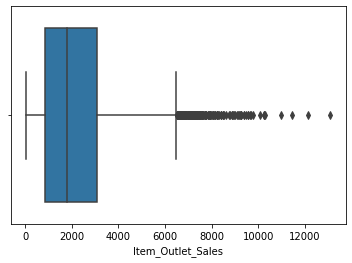

In [13]:
sns.boxplot(df['Item_Outlet_Sales']) #INI HASIL AKHIRNYA NANTI YG DIPREDIKSI 

In [14]:
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [15]:
df['Outlet_Size'].isna().sum()

0

In [ ]:
boleh pake item type yg item visibility

In [16]:
## mengecek apakah ada barang yg visibility nya 0 (tidak bisa dilihat) #apakah isa d blg nan?jd nti pake fil apa dibiarke gpp
df[df['Item_Visibility']==0].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1450,FDZ20,13.224769,Low Fat,0.0,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4346,FDY55,13.224769,Low Fat,0.0,Fruits and Vegetables,255.7988,OUT027,1985,Medium,Tier 3,Supermarket Type3,9251.9568
472,FDU56,13.224769,Low Fat,0.0,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704
4676,DRE49,11.847460,Low Fat,0.0,Soft Drinks,153.8024,OUT027,1985,Medium,Tier 3,Supermarket Type3,7741.9224
7562,FDY39,12.817344,Regular,0.0,Meat,182.0608,OUT027,1985,Medium,Tier 3,Supermarket Type3,7717.9536
...,...,...,...,...,...,...,...,...,...,...,...,...
7585,FDZ27,13.426069,Low Fat,0.0,Dairy,51.2350,OUT019,1985,Small,Tier 1,Grocery Store,49.9350
8486,FDR20,20.000000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
1913,DRK49,11.847460,LF,0.0,Soft Drinks,40.5138,OUT019,1985,Small,Tier 1,Grocery Store,40.6138
2055,FDQ36,12.277108,Regular,0.0,Baking Goods,38.1848,OUT019,1985,Small,Tier 1,Grocery Store,37.2848


Ternyata ada Barang yg tidak terlihat sebanyak 526 row. dan ternyata malah mempunyai penjualan tinggi

In [ ]:
PAKE TYPE

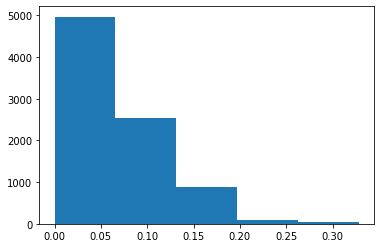

In [17]:
plt.hist(df['Item_Visibility'], bins=5)
plt.show()

In [18]:
#Dari plot diatas bisa di simpulkan bahwa semakin rendah tingkat kelihatannya, barangnya akan semakin banyak (mungkin kecil barangnya)


In [19]:
df[df['Item_Visibility']>=0.3].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4382,FDG32,13.224769,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
3750,NCZ18,13.384736,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
3474,FDS12,12.277108,LF,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
2251,FDY21,12.987880,LF,0.303743,Snack Foods,196.0110,OUT019,1985,Small,Tier 1,Grocery Store,589.2330
854,FDU13,12.305705,low fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
6622,FDI32,13.224769,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
5732,FDC34,12.987880,Regular,0.302479,Snack Foods,155.4972,OUT019,1985,Small,Tier 1,Grocery Store,311.5944
7603,DRF01,11.847460,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
1805,FDJ56,13.224769,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.350000,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,Medium,Tier 3,Grocery Store,154.4656


In [29]:
df.sort_values(by='Item_Outlet_Sales',ascending=False) #ternyata blm tentu yg gampang kelihatan malah lebih laku

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.792854,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,12.792854,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,12.792854,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,12.792854,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,12.792854,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


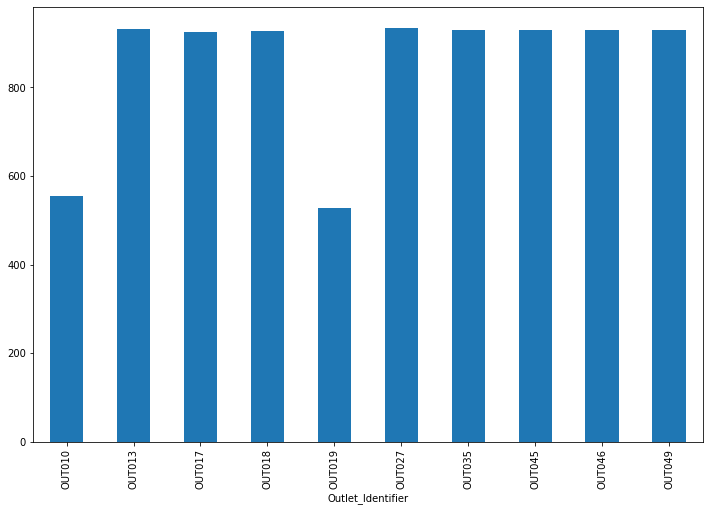

In [20]:
plt.figure(figsize=(12,8))
df.groupby(['Outlet_Identifier']).size().plot(kind='bar')
plt.show()

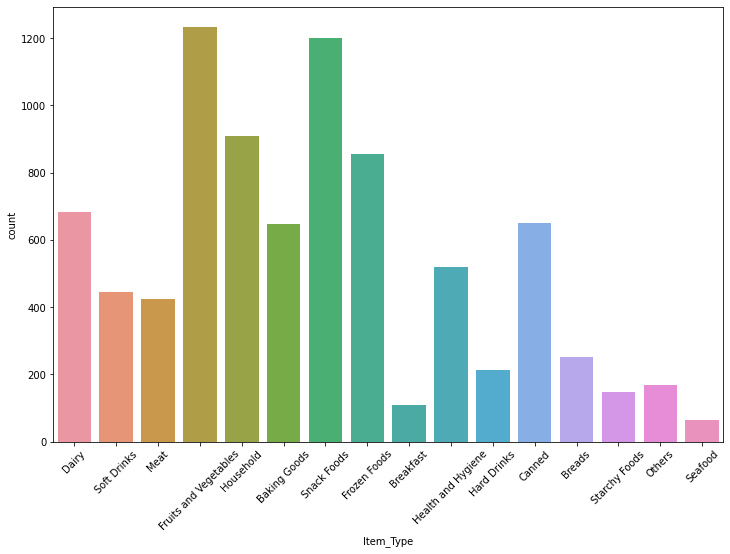

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=45)
plt.show()

Disini bisa dilihat kalo Fruit & Vegetables itu terbanyak, jadi wajar juga kalo dia termasuk paling tinggi dalam penjualan (item Oulet sales)

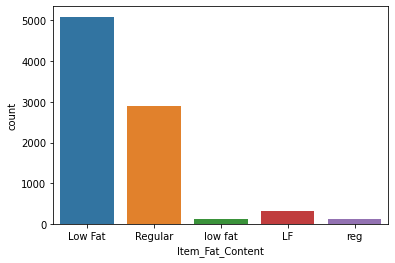

In [22]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

Dari sini bisa diliat ada 5 jenis data yaitu low fat, reguler , lf ,Low fat dan reg. maka ini harus kita betulkan karna dari data informasi pun bisa dilihat bahwa seharusnya item fat content itu menentukan apakah Low Fat / Tidak

In [23]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df['Item_Fat_Content'].replace('low fat', "Low Fat",inplace=True)

In [25]:
df['Item_Fat_Content'].replace('LF', "Low Fat",inplace=True)

In [26]:
df['Item_Fat_Content'].replace('reg', "Regular",inplace=True)

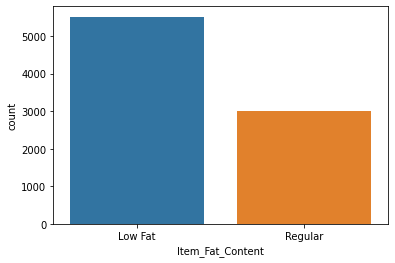

In [27]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

In [28]:
df[df['Item_Type']=='Snack Foods'].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4349,FDP33,12.98788,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
333,FDN58,12.98788,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360
6409,FDA21,13.65000,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
3154,FDH10,12.98788,Low Fat,0.049066,Snack Foods,192.4478,OUT027,1985,Medium,Tier 3,Supermarket Type3,8912.3988
2293,FDR45,10.80000,Low Fat,0.029002,Snack Foods,238.6222,OUT045,2002,Medium,Tier 2,Supermarket Type1,8604.7992
...,...,...,...,...,...,...,...,...,...,...,...,...
6644,FDT46,12.98788,Low Fat,0.053939,Snack Foods,52.1008,OUT019,1985,Small,Tier 1,Grocery Store,50.6008
4219,FDU33,7.63000,Regular,0.225477,Snack Foods,45.1402,OUT010,1998,Medium,Tier 3,Grocery Store,45.9402
5946,FDU33,12.98788,Regular,0.235859,Snack Foods,46.1402,OUT019,1985,Small,Tier 1,Grocery Store,45.9402
6871,FDV10,12.98788,Regular,0.116794,Snack Foods,41.0112,OUT019,1985,Small,Tier 1,Grocery Store,42.6112


In [29]:
df.sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,13.384736,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,13.224769,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,13.224769,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,12.987880,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,12.305705,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
7388,FDQ47,7.155000,Regular,0.281510,Breads,33.8874,OUT010,1998,Medium,Tier 3,Grocery Store,35.2874
3053,NCL41,13.142314,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,1985,Small,Tier 1,Grocery Store,34.6216
2571,FDU21,12.987880,Regular,0.134328,Snack Foods,35.0558,OUT019,1985,Small,Tier 1,Grocery Store,33.9558
6950,NCR42,9.105000,Low Fat,0.064411,Household,33.3900,OUT010,1998,Medium,Tier 3,Grocery Store,33.2900


In [30]:
df[df['Item_Type']=='Seafood'].sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2528,FDI57,19.850000,Low Fat,0.054026,Seafood,197.2768,OUT046,1997,Small,Tier 1,Supermarket Type1,6503.5344
8395,FDG21,17.350000,Regular,0.000000,Seafood,150.2050,OUT045,2002,Medium,Tier 2,Supermarket Type1,5992.2000
5042,FDI09,20.750000,Regular,0.129864,Seafood,240.1880,OUT018,2009,Medium,Tier 3,Supermarket Type2,5992.2000
4338,FDH21,12.552843,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
8328,FDI57,19.850000,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504
...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FDJ45,12.552843,Low Fat,0.128533,Seafood,34.2216,OUT019,1985,Small,Tier 1,Grocery Store,173.1080
2728,FDG33,5.365000,Regular,0.234733,Seafood,173.4764,OUT010,1998,Medium,Tier 3,Grocery Store,171.7764
1575,FDG33,12.552843,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
4502,FDH21,10.395000,Low Fat,0.052264,Seafood,158.4604,OUT010,1998,Medium,Tier 3,Grocery Store,158.4604


Dari data ini berati bisa disimpulkan bahwa ternyata walaupun Item Typenya tidak terlalu banyak , belum tentu mendapatkan penghasilan yg kecil

In [32]:
pip install dython

     |████████████████████████████████| 6.8 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 56.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
from dython.nominal import associations

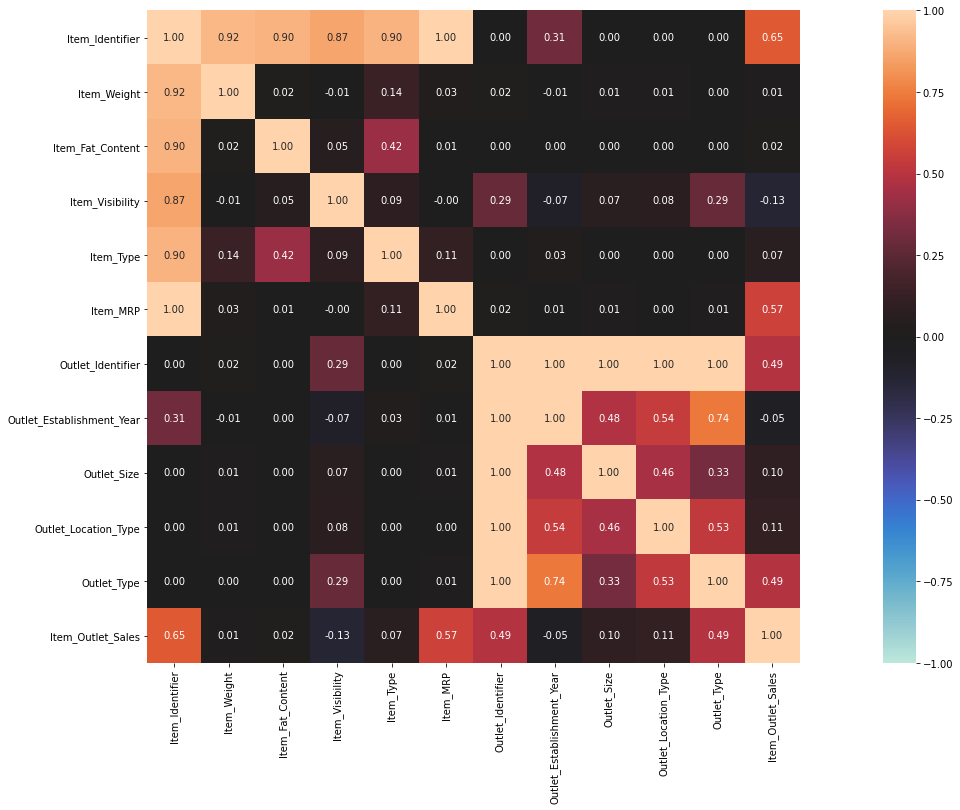

In [34]:
associations(df,figsize=(30,12))
plt.show() #coba pilih salah satu yg kuning

In [35]:
df.sort_values(by='Outlet_Establishment_Year')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4338,FDH21,12.552843,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
3689,FDD53,12.867061,Low Fat,0.044008,Frozen Foods,43.7454,OUT027,1985,Medium,Tier 3,Supermarket Type3,671.1264
1139,FDH26,12.305705,Regular,0.034532,Canned,142.2496,OUT027,1985,Medium,Tier 3,Supermarket Type3,2399.5432
1138,FDM21,12.987880,Low Fat,0.064052,Snack Foods,256.1646,OUT027,1985,Medium,Tier 3,Supermarket Type3,7472.2734
3691,FDY36,12.277108,Low Fat,0.016477,Baking Goods,74.3380,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
...,...,...,...,...,...,...,...,...,...,...,...,...
3600,FDX31,20.350000,Regular,0.014886,Fruits and Vegetables,234.4958,OUT018,2009,Medium,Tier 3,Supermarket Type2,3271.7412
5053,NCO53,16.200000,Low Fat,0.175898,Health and Hygiene,183.7608,OUT018,2009,Medium,Tier 3,Supermarket Type2,2940.1728
7710,NCR18,15.850000,Low Fat,0.020571,Household,41.6112,OUT018,2009,Medium,Tier 3,Supermarket Type2,255.6672
5750,FDV26,20.250000,Regular,0.076471,Dairy,196.1794,OUT018,2009,Medium,Tier 3,Supermarket Type2,2731.1116


In [36]:
pd.crosstab(df['Outlet_Establishment_Year'],df['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Establishment_Year,,,,,,,,,,
1985,0,0,0,0,528,935,0,0,0,0
1987,0,932,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,930,0
1998,555,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,930
2002,0,0,0,0,0,0,0,929,0,0
2004,0,0,0,0,0,0,930,0,0,0
2007,0,0,926,0,0,0,0,0,0,0
2009,0,0,0,928,0,0,0,0,0,0


In [37]:
pd.crosstab(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Establishment_Year,,,
1985,528,0,935
1987,0,0,932
1997,930,0,0
1998,0,0,555
1999,930,0,0
2002,0,929,0
2004,0,930,0
2007,0,926,0
2009,0,0,928


In [38]:
df['Outlet_Identifier'].unique() #dari sini kita bining Outlet yg berdiri tahun 2000keatas dan yg 2000 kebawah

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [40]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
df['Item_Type'].nunique()

16

In [42]:
perishable = ['Meat','Dairy','Fruits and Vegetables','Breakfast','Breads','Starchy Foods','Seafood']
non = ['Snack Foods','Frozen Foods','Hard Drinks','Canned','Soft Drinks','Baking Goods']
others = ['Household','Health and Hygiene','Others']